# **Лабораторная работа №4**
**Линейные модели, SVM и деревья решений**
<hr></hr>

**<h2>Задание:</h2>**
  

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
  * одну из линейных моделей (линейную или полиномиальную регрессию при решении
задачи регрессии, логистическую регрессию при решении задачи классификации);
  * SVM;
  * дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.
<hr></hr>

# **Ход работы**

Возьмем датасет *Medical Cost* (https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hdata_loaded = pd.read_csv('insurance.csv', sep=",")
hdata_loaded.shape

(1338, 7)

In [3]:
hdata_loaded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
list(zip(hdata_loaded.columns, [i for i in hdata_loaded.dtypes]))

[('age', dtype('int64')),
 ('sex', dtype('O')),
 ('bmi', dtype('float64')),
 ('children', dtype('int64')),
 ('smoker', dtype('O')),
 ('region', dtype('O')),
 ('charges', dtype('float64'))]

In [5]:
hdata = hdata_loaded
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na


[]

Пропусков нет
<hr></hr>
С использованием метода train_test_split разделим выборку на обучающую и тестовую.

In [6]:
hdata = pd.get_dummies(hdata, columns=["sex", "smoker", "region"], drop_first=True)
hdata.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [7]:
from sklearn.model_selection import train_test_split

# Определяем признаки (X) и целевую переменную (y)
X = hdata.drop(columns=["charges"])  # Все признаки кроме 'charges'
y = hdata["charges"]  # Целевая переменная (стоимость страховки)


# Проверяем размерности
print(f"Размер X: {X.shape}")
print(f"Размер y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(f"Обучающая выборка: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Тестовая выборка: X_test = {X_test.shape}, y_test = {y_test.shape}")


Размер X: (1338, 8)
Размер y: (1338,)
Обучающая выборка: X_train = (1070, 8), y_train = (1070,)
Тестовая выборка: X_test = (268, 8), y_test = (268,)


Линейная регрессия

In [8]:
from sklearn.linear_model import LinearRegression
# Обучаем модель линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Делаем предсказания
y_pred_lin = lin_reg.predict(X_test)


 SVR (Метод опорных векторов)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
 # Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем SVR с радиальной базисной функцией (RBF)
svr = SVR(kernel="rbf")
svr.fit(X_train_scaled, y_train)

# Делаем предсказания
y_pred_svr = svr.predict(X_test_scaled)


 Дерево решений

In [12]:
from sklearn.tree import DecisionTreeRegressor
# Обучаем дерево решений
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Делаем предсказания
y_pred_tree = tree_reg.predict(X_test)


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f" - MAE: {mae:.2f}")
    print(f" - R²: {r2:.2f}\n")

# Оцениваем модели
evaluate_model(y_test, y_pred_lin, "Линейная регрессия")
evaluate_model(y_test, y_pred_svr, "SVM (SVR)")
evaluate_model(y_test, y_pred_tree, "Дерево решений")


Линейная регрессия:
 - MAE: 4181.19
 - R²: 0.78

SVM (SVR):
 - MAE: 8612.41
 - R²: -0.07

Дерево решений:
 - MAE: 3195.11
 - R²: 0.73



<ipython-input-15-f59a33e8a5b1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df["Importance"], y=features_df["Feature"], palette="viridis")


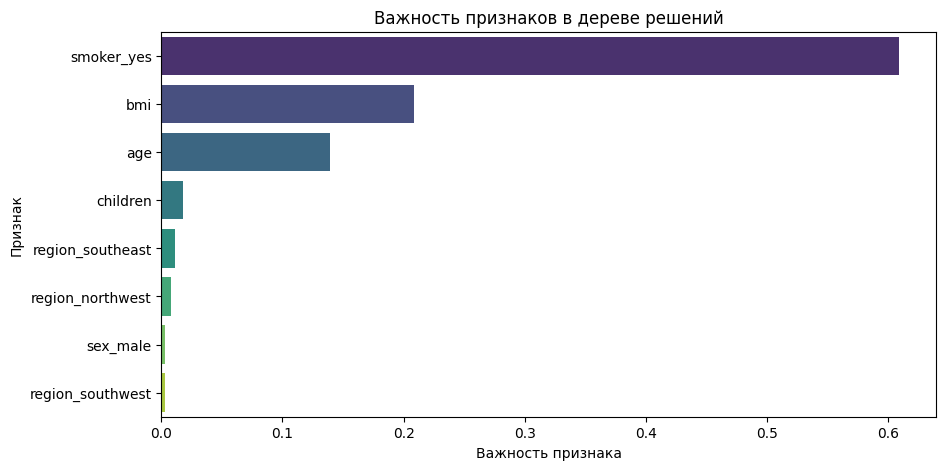

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Получаем важность признаков
feature_importance = tree_reg.feature_importances_

# Создаём DataFrame для удобного отображения
features_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
features_df = features_df.sort_values(by="Importance", ascending=False)

# Строим график
plt.figure(figsize=(10, 5))
sns.barplot(x=features_df["Importance"], y=features_df["Feature"], palette="viridis")
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.title("Важность признаков в дереве решений")
plt.show()


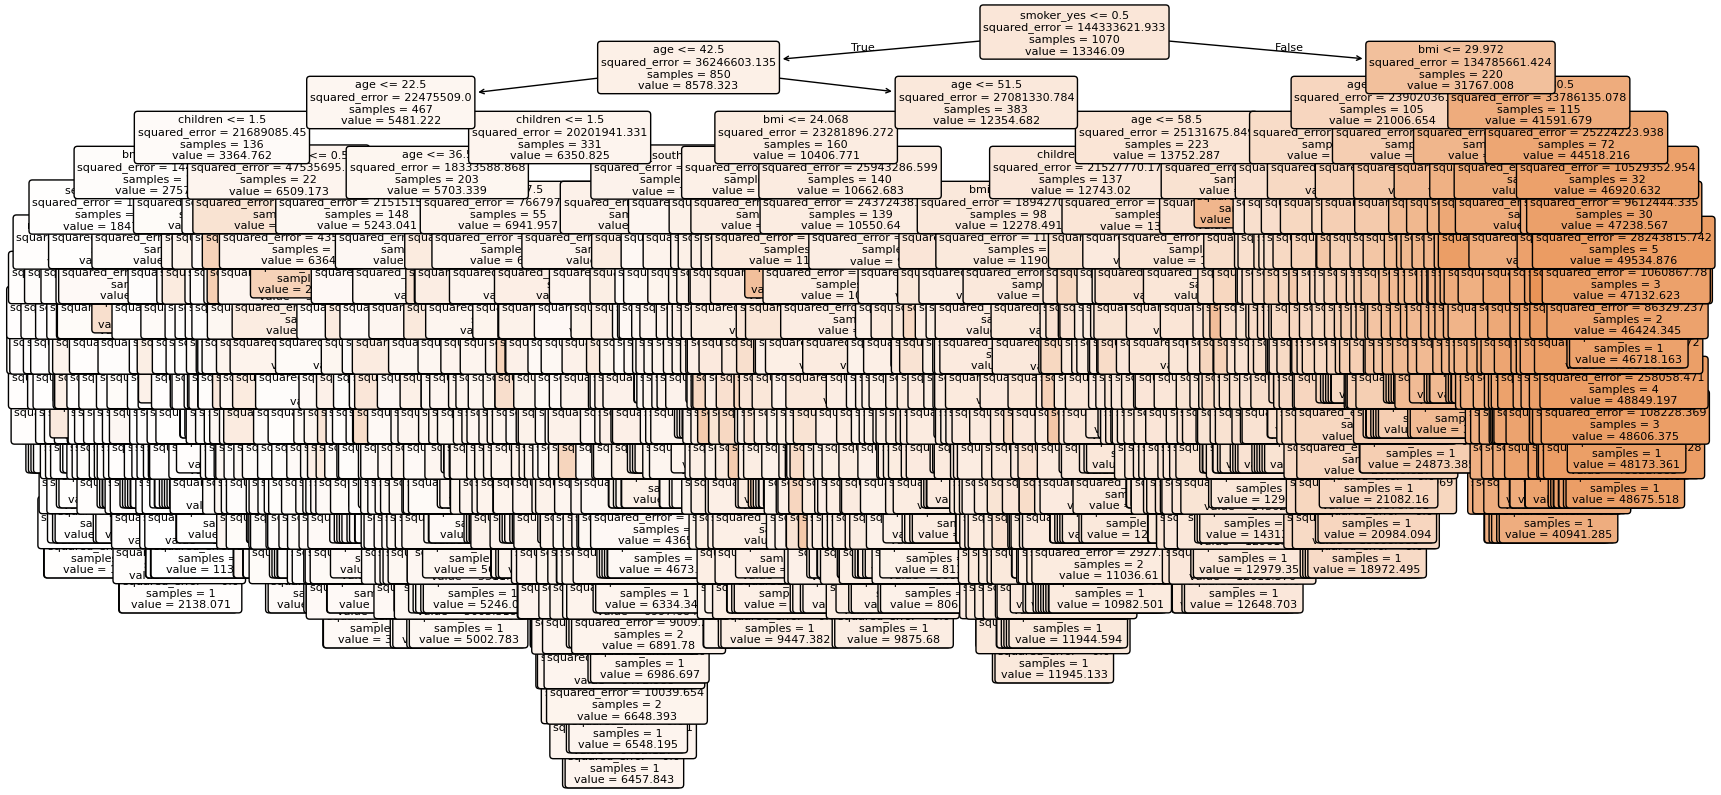

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()


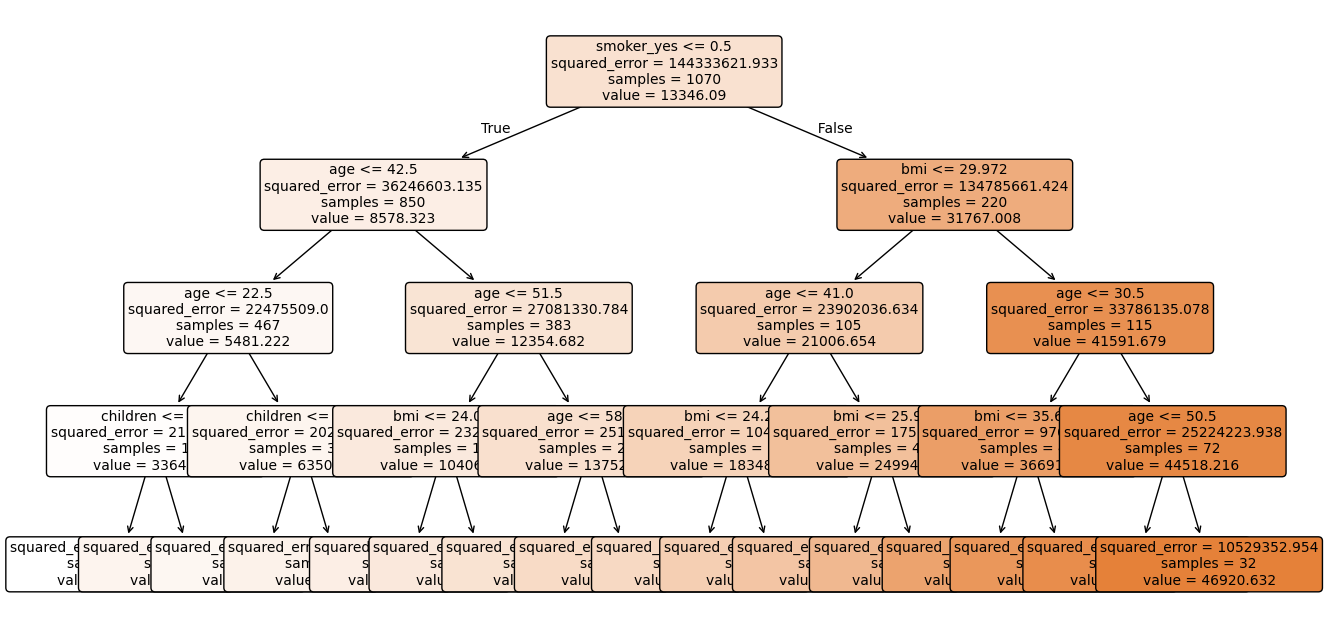

In [17]:
# Ограничиваем глубину дерева, например, до 4 уровней
tree_reg_limited = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg_limited.fit(X_train, y_train)

# Визуализируем более компактное дерево
plt.figure(figsize=(15, 8))
plot_tree(tree_reg_limited, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()


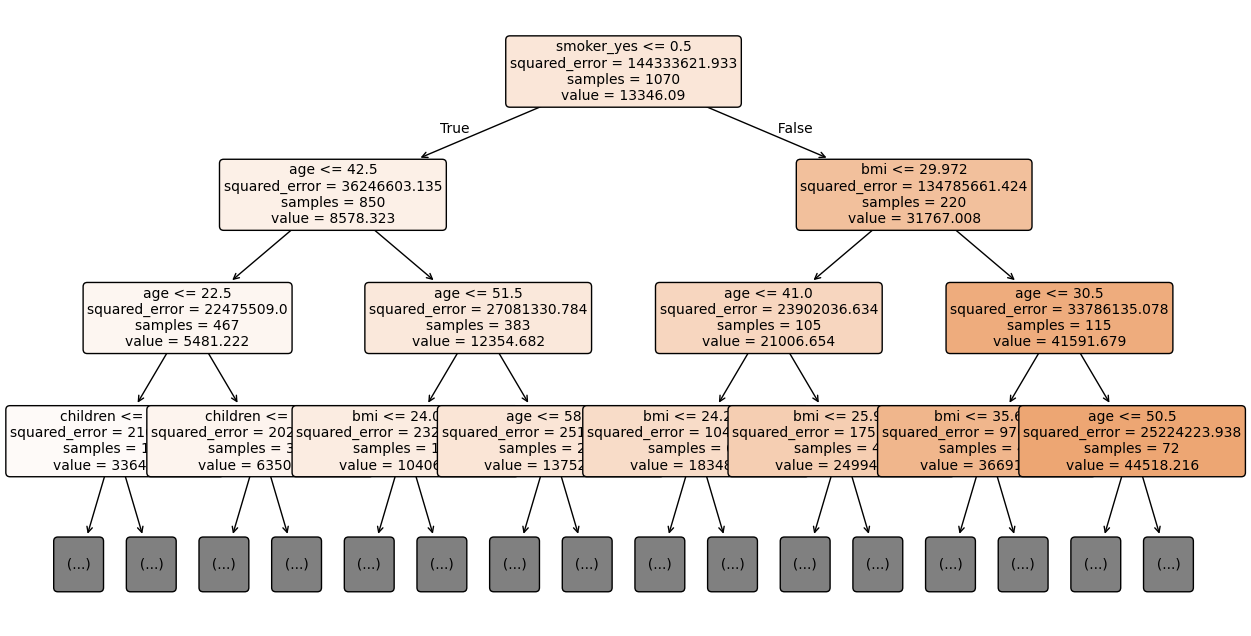

In [19]:
plt.figure(figsize=(15, 8))
plot_tree(tree_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.show()
